### Modelos Preditivos
### Trabalho prático usando Python
#### Técnicas Supervisionadas de Classificação: Árvore de Decisão e Regressão Logística- Modelo de Inadimplência PF

#### Segmento Cartão de Crédito
#### A área de crédito deseja avaliar a propensão ao risco de seus clientes e implementar políticas de redução da inadimplência
#### Dicionário de variáveis¶


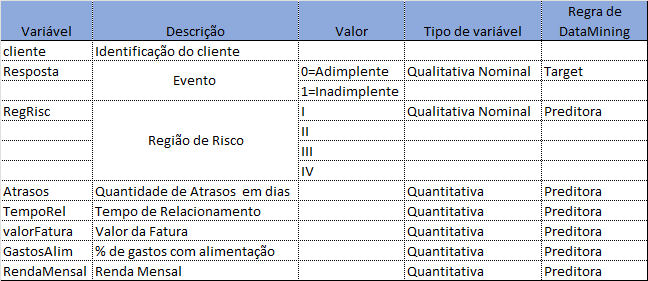

In [89]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.tree import plot_tree

from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score

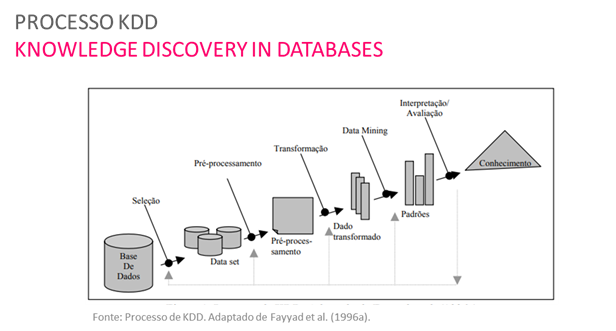

In [90]:
# Importar os dados
Base_Inad = pd.read_csv(r"Inadimplencia_quantitativa_2.csv", sep=";")

print("Total number of transactions: "+ str(Base_Inad.shape[0]))
Base_Inad.head(5)


Total number of transactions: 10986


,cliente,Resposta,RegRisc,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
0,2,0,III,2,5148,62,4,4364
1,6,0,I,7,5030,163,17,4351
2,8,1,II,12,235,250,16,1375
3,9,1,I,37,300,381,64,1777
4,13,0,I,7,223,8055,10,3909


In [91]:
Base_Inad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cliente      10986 non-null  int64 
 1   Resposta     10986 non-null  int64 
 2   RegRisc      10986 non-null  object
 3   Atrasos      10986 non-null  int64 
 4   TempoRel     10986 non-null  int64 
 5   valorFatura  10986 non-null  int64 
 6   GastosAlim   10986 non-null  int64 
 7   RendaMensal  10986 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 686.8+ KB


In [92]:
# Mudar o formato da variável resposta para qualitativa

# Base_Inad['Resposta'] = Base_Inad['Resposta'].astype('category')

# Base_Inad['Resposta'] = Base_Inad['Resposta'].astype(str)

In [93]:
Base_Inad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cliente      10986 non-null  int64 
 1   Resposta     10986 non-null  int64 
 2   RegRisc      10986 non-null  object
 3   Atrasos      10986 non-null  int64 
 4   TempoRel     10986 non-null  int64 
 5   valorFatura  10986 non-null  int64 
 6   GastosAlim   10986 non-null  int64 
 7   RendaMensal  10986 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 686.8+ KB


In [94]:
Base_Inad.describe()

,cliente,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
count,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000
mean,12947.128982,0.499090,19.687147,1796.758147,1400.987348,27.069634,6053.556800
std,7508.724663,0.500022,17.716952,1610.791743,2405.437586,22.992852,7434.910169
min,2.000000,0.000000,0.000000,180.000000,45.000000,0.000000,750.000000
25%,6499.000000,0.000000,4.000000,337.000000,207.000000,10.000000,1515.000000
50%,12884.500000,0.000000,15.000000,1144.500000,560.500000,22.000000,2991.000000
75%,19477.500000,1.000000,29.000000,2975.000000,1198.750000,31.000000,4527.250000
max,25984.000000,1.000000,65.000000,5475.000000,100000.000000,90.000000,29986.000000


In [95]:
pd.DataFrame(zip(Base_Inad.isnull().sum(), Base_Inad.isnull().sum()/len(Base_Inad)), columns=['Count', 'Proportion'], index=Base_Inad.columns)


,Count,Proportion
cliente,0,0.0
Resposta,0,0.0
RegRisc,0,0.0
Atrasos,0,0.0
TempoRel,0,0.0
valorFatura,0,0.0
GastosAlim,0,0.0
RendaMensal,0,0.0


In [96]:
# Tabela de frequência da variável Resposta do modelo
Resposta =pd.pivot_table(Base_Inad, index='Resposta', values='cliente', aggfunc=np.count_nonzero)
Resposta['%'] = ((pd.pivot_table(Base_Inad, index='Resposta', values = 'cliente', aggfunc=np.count_nonzero)/Base_Inad['cliente'].count())*100).round(2)

Resposta

,cliente,%
Resposta,,
0,5503,50.09
1,5483,49.91


<AxesSubplot:xlabel='Resposta', ylabel='count'>

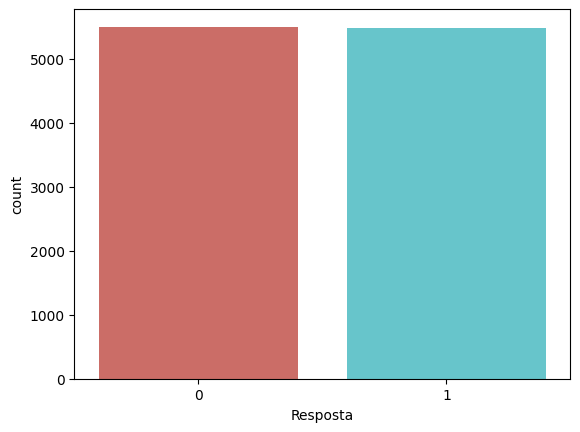

In [97]:
# Como estamos construindo um modelo para prever a Inadimplência de um cliente da rede:0=Adimplente 1=Inadimplente 
# Para ter certeza de que é uma variável binária, vamos usar a função countplot () do Seaborn.
 
sb.countplot(x='Resposta',data=Base_Inad, palette='hls')

<AxesSubplot:xlabel='Resposta', ylabel='Atrasos'>

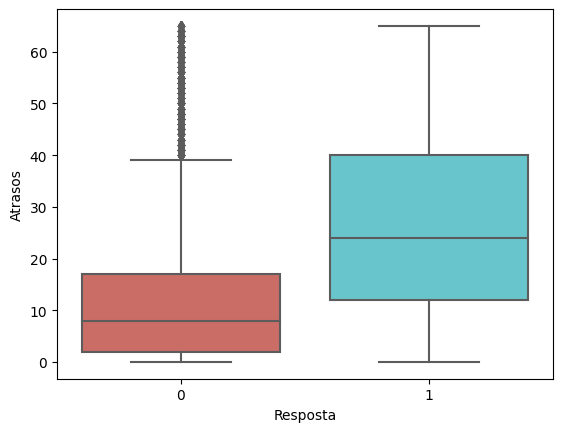

In [98]:
sb.boxplot(x='Resposta', y='Atrasos', data=Base_Inad, palette='hls')

<AxesSubplot:xlabel='Resposta', ylabel='TempoRel'>

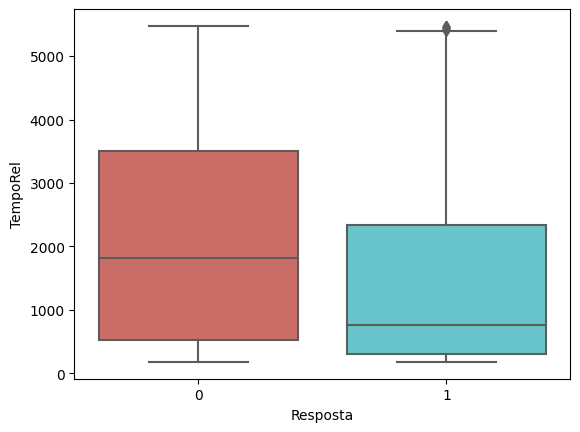

In [99]:
sb.boxplot(x='Resposta', y='TempoRel', data=Base_Inad, palette='hls')

In [100]:
# transformando a varíavel tempo de relacionamento em anos
Base_Inad['TempoRel'] = Base_Inad['TempoRel']/365
Base_Inad.describe()

,cliente,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
count,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000,10986.000000
mean,12947.128982,0.499090,19.687147,4.922625,1400.987348,27.069634,6053.556800
std,7508.724663,0.500022,17.716952,4.413128,2405.437586,22.992852,7434.910169
min,2.000000,0.000000,0.000000,0.493151,45.000000,0.000000,750.000000
25%,6499.000000,0.000000,4.000000,0.923288,207.000000,10.000000,1515.000000
50%,12884.500000,0.000000,15.000000,3.135616,560.500000,22.000000,2991.000000
75%,19477.500000,1.000000,29.000000,8.150685,1198.750000,31.000000,4527.250000
max,25984.000000,1.000000,65.000000,15.000000,100000.000000,90.000000,29986.000000


<AxesSubplot:xlabel='Resposta', ylabel='valorFatura'>

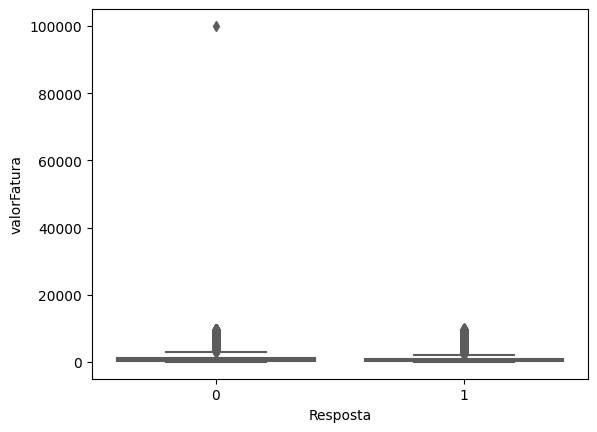

In [101]:
sb.boxplot(x='Resposta', y='valorFatura', data=Base_Inad, palette='hls')

In [102]:
# Uma opção sobre como eliminar outliers é achatamento de algum valor descrepante

Base_Inad.loc[Base_Inad['valorFatura']>=50000, 'valorFatura'] = 10000           
         

<AxesSubplot:xlabel='Resposta', ylabel='valorFatura'>

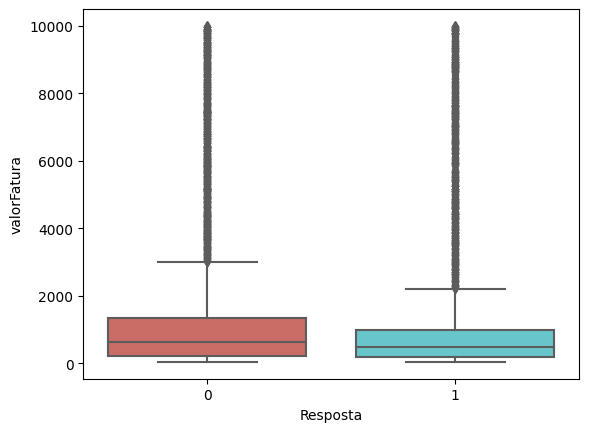

In [103]:
sb.boxplot(x='Resposta', y='valorFatura', data=Base_Inad, palette='hls')

<AxesSubplot:xlabel='Resposta', ylabel='GastosAlim'>

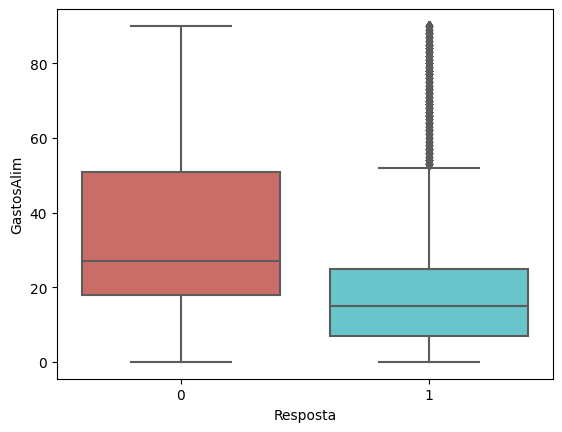

In [104]:
sb.boxplot(x='Resposta', y='GastosAlim', data=Base_Inad, palette='hls')

<AxesSubplot:xlabel='Resposta', ylabel='RendaMensal'>

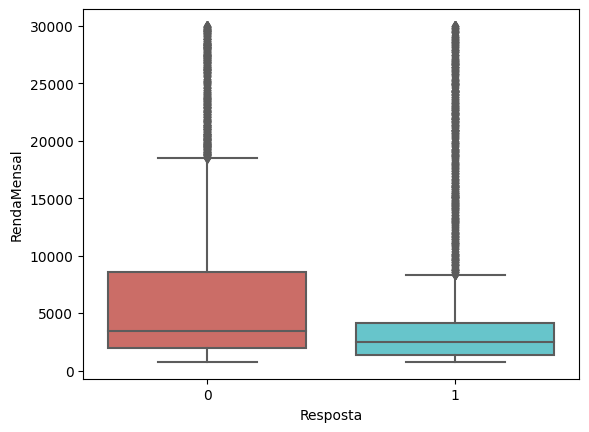

In [105]:
sb.boxplot(x='Resposta', y='RendaMensal', data=Base_Inad, palette='hls')

<AxesSubplot:xlabel='RegRisc'>

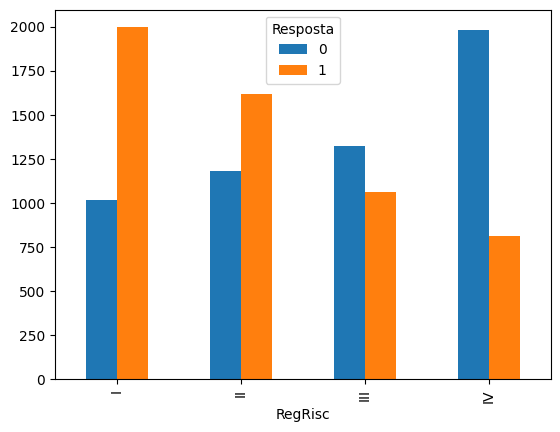

In [106]:
ordem = ['I','II','III', 'IV'] 
Base_Inad.groupby('Resposta')['RegRisc'].value_counts().unstack(0).loc[ordem].plot.bar()

In [107]:
# Converting categorical variables to a dummy indicators
RgRisk = pd.get_dummies(Base_Inad['RegRisc'],drop_first=True)
RgRisk.head()

,II,III,IV
0,0,1,0
1,0,0,0
2,1,0,0
3,0,0,0
4,0,0,0


In [108]:
# Alterando os dados
Base_Inad.drop(['cliente','RegRisc'],axis=1,inplace=True)
Base_Inad.head()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal
0,0,2,14.104110,62,4,4364
1,0,7,13.780822,163,17,4351
2,1,12,0.643836,250,16,1375
3,1,37,0.821918,381,64,1777
4,0,7,0.610959,8055,10,3909


In [109]:
Base_Inad_dmy = pd.concat([Base_Inad,RgRisk],axis=1)
Base_Inad_dmy.head()

,Resposta,Atrasos,TempoRel,valorFatura,GastosAlim,RendaMensal,II,III,IV
0,0,2,14.104110,62,4,4364,0,1,0
1,0,7,13.780822,163,17,4351,0,0,0
2,1,12,0.643836,250,16,1375,1,0,0
3,1,37,0.821918,381,64,1777,0,0,0
4,0,7,0.610959,8055,10,3909,0,0,0


In [110]:
Base_Inad_dmy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10986 entries, 0 to 10985
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Resposta     10986 non-null  int64  
 1   Atrasos      10986 non-null  int64  
 2   TempoRel     10986 non-null  float64
 3   valorFatura  10986 non-null  int64  
 4   GastosAlim   10986 non-null  int64  
 5   RendaMensal  10986 non-null  int64  
 6   II           10986 non-null  uint8  
 7   III          10986 non-null  uint8  
 8   IV           10986 non-null  uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 547.3 KB


In [111]:
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento

X = Base_Inad_dmy.iloc[:,[1,2,3,4,5,6,7,8]].values
y = Base_Inad_dmy.iloc[:,0].values
X.shape, y.shape


((10986, 8), (10986,))

In [112]:
# Agora dividir em treino e teste (teste com 30%)


# Dividindo os dados em treino e teste:
X_train, X_test, y_train, y_test = train_test_split(Base_Inad_dmy.drop('Resposta',axis=1),Base_Inad_dmy['Resposta'],test_size=0.3, random_state=17)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

X_train.shape, X_test.shape

((7690, 8), (3296, 8))

In [113]:
y_train.shape, y_test.shape

((7690,), (3296,))

In [114]:
y_test.head()

641     0
4832    1
3338    1
7123    0
1040    1
Name: Resposta, dtype: int64

In [115]:
X_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7690 entries, 5581 to 10863
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Atrasos      7690 non-null   int64  
 1   TempoRel     7690 non-null   float64
 2   valorFatura  7690 non-null   int64  
 3   GastosAlim   7690 non-null   int64  
 4   RendaMensal  7690 non-null   int64  
 5   II           7690 non-null   uint8  
 6   III          7690 non-null   uint8  
 7   IV           7690 non-null   uint8  
dtypes: float64(1), int64(4), uint8(3)
memory usage: 383.0 KB


# Primeiro MODELO: ÁRVORE DE DECISÃO 

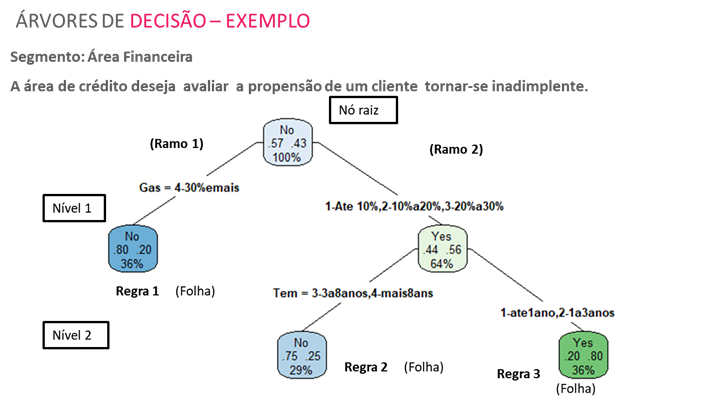

In [116]:
# Criando modelo 

Classif_tree = DecisionTreeClassifier()
 

#### Treinando o modelo de arvore de decisão:

In [117]:
classif = Classif_tree.fit(X_train, y_train)

# Como treinamos a árvore sem especificar nenhum parâmetro, 
# ela cresceu de forma indefinida e ficou grande demais impossibilitando a visualização da mesma.


In [118]:
# Verificando as features mais importantes para o modelo treinado:
classif.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([0.25946868, 0.1274149 , 0.11553552, 0.13155239, 0.22713413,
       0.020948  , 0.03090051, 0.08704587])

In [119]:
for feature,importancia in zip(X_train.columns,classif.feature_importances_):
    print("{}:{}".format(feature, importancia))

Atrasos:0.2594686787104025
TempoRel:0.1274149022471407
valorFatura:0.11553552269107809
GastosAlim:0.13155239492911425
RendaMensal:0.22713412583441997
II:0.020947995205698948
III:0.030900510764735024
IV:0.08704586961741051


In [120]:
# Testando o modelo
y_pred_all = classif.predict(X_test)

In [121]:
from sklearn.metrics import confusion_matrix
# Matriz de Confusão

confusion_matrix = confusion_matrix(y_test, y_pred_all)
confusion_matrix


array([[1613,   28],
       [  21, 1634]])

In [122]:
print(classification_report(y_test, y_pred_all))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1641
           1       0.98      0.99      0.99      1655

    accuracy                           0.99      3296
   macro avg       0.99      0.99      0.99      3296
weighted avg       0.99      0.99      0.99      3296



#### Parâmetros do classificador DecisionTreeClassifier

In [123]:
# criterion: medida de qualidade da divisão, aqui que definimos qual dessas métricas (Indice Gini, Chi-Square, Information Gain ou a redução da variância) iremos usar.
# splitter: estratégia utilizada para dividir o nó de decisão.
# max_depth: profundidade máxima da árvore.
# min_samples_split: número de amostras mínimas para considerar um nó para divisão.
# min_samples_leaf: número de amostras mínimas no nível folha.
# clf = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

# clf = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=0)

In [124]:
clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

clf.fit(X_train, y_train)

/home/alison/Documents/FIAP/conceitos_ia/venv/lib/python3.8/site-packages/sklearn/tree/_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


DecisionTreeClassifier(max_depth=6, max_features='auto', random_state=0)

In [125]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

array([3.17954894e-01, 1.06990060e-01, 3.60268792e-02, 2.53137514e-01,
       1.01838747e-01, 1.21305105e-04, 6.60778080e-02, 1.17852793e-01])

In [126]:
for feature,importancia in zip(X_train.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

Atrasos:0.317954893578902
TempoRel:0.10699005958467993
valorFatura:0.03602687918492097
GastosAlim:0.2531375143451437
RendaMensal:0.10183874687775145
II:0.00012130510520451215
III:0.06607780804348205
IV:0.1178527932799154


In [127]:
# Testando o modelo
y_pred = clf.predict(X_test)

In [128]:
y_pred

# O código acima nos da a seguinte saída:

array([0, 1, 0, ..., 0, 0, 0])

### Predição da Árvore de Decisão

### Avaliação do acerto da Árvore de Classificação

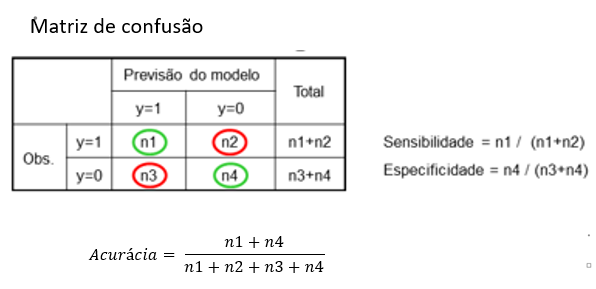

### Precision score = n4/(n3+n4)
### Recall score = n4/(n2+n4)
### F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)

link: https://vitalflux.com/accuracy-precision-recall-f1-score-python-example/

In [129]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix


array([[1374,  267],
       [ 404, 1251]])

In [130]:
print(classification_report(y_test, y_pred))

# Resultado do classification_report:

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      1641
           1       0.82      0.76      0.79      1655

    accuracy                           0.80      3296
   macro avg       0.80      0.80      0.80      3296
weighted avg       0.80      0.80      0.80      3296



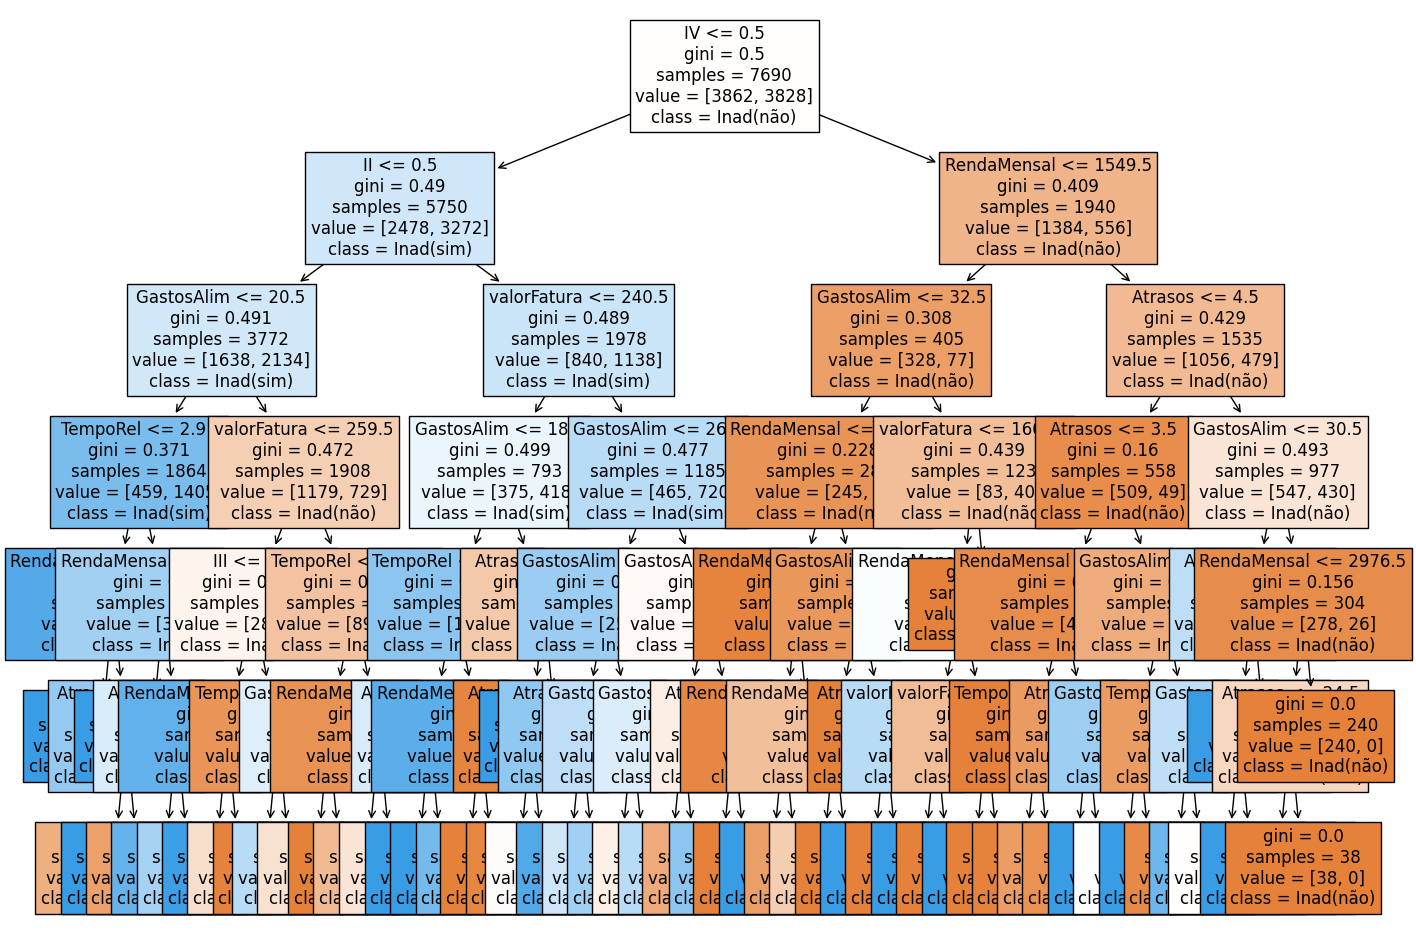

In [131]:

fig = plt.figure(figsize=(16,12))
a = plot_tree(clf, feature_names=X_train.columns, fontsize=12,
filled=True,
class_names=['Inad(não)', 'Inad(sim)'])

# SEGUNDO MODELO: REGRESSÃO LOGÍSTICA

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

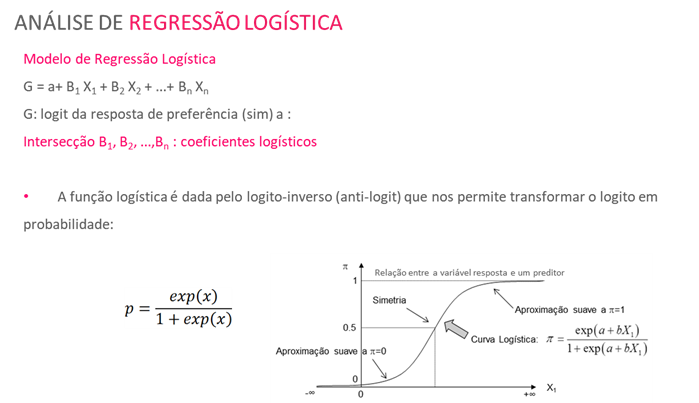

In [132]:

# criar o classificador com a função LogisticRegression():

# instancia o classificador com nome logit
logreg = LogisticRegression()



In [133]:
#Em seguida, você precisa treinar o seu modelo. Precisamos rodar a regressão para X_train e y_train:

# treina o modelo
logistica = logreg.fit(X_train, y_train)

/home/alison/Documents/FIAP/conceitos_ia/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [134]:
# faz predicao e salva em y_pred
y_pred_log = logreg.predict(X_test)
y_pred_log

array([0, 1, 1, ..., 1, 0, 1])

In [135]:

# acuracia
logreg.score(X_test, y_test)


0.7512135922330098

In [136]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_log = confusion_matrix(y_test, y_pred_log)
confusion_matrix_log

array([[1279,  362],
       [ 458, 1197]])

#### alternativas 

A curva ROC (Receiver Operating Characteristic Curve) leva em conta a TPR (True Positive Rate ou Recall ou Sensitity) e a FPR (False Positive Rate ou Specificity).

A curva ROC traça esses dois parâmetros. o AUC (Area Under the Curve) é um valor que sintetiza a informação da curva ROC. Ela varia de 0.5 a 1. Em suma, essa métrica nos diz o quanto o modelo é capaz de distinguir as duas classes. 

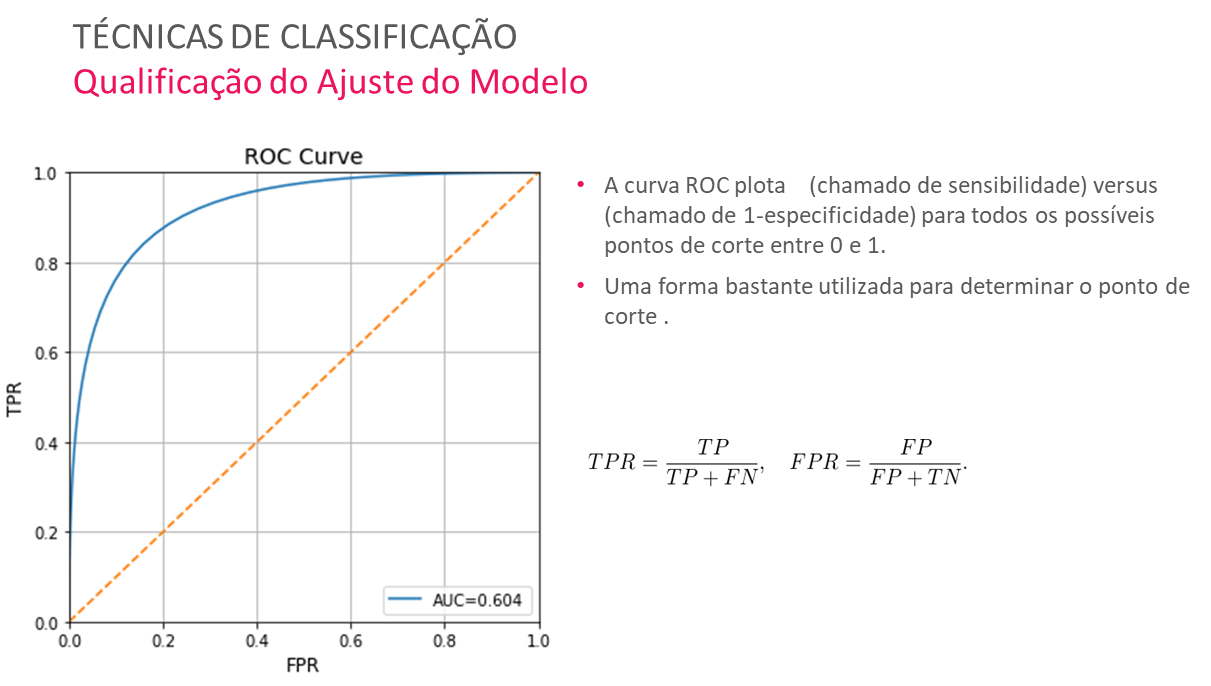

In [137]:

# outras metricas
print(classification_report(y_test, y_pred_log))



              precision    recall  f1-score   support

           0       0.74      0.78      0.76      1641
           1       0.77      0.72      0.74      1655

    accuracy                           0.75      3296
   macro avg       0.75      0.75      0.75      3296
weighted avg       0.75      0.75      0.75      3296



In [138]:
# computa probabilidades
y_pred_prob = logreg.predict_proba(X_test)[:,1]
y_pred_prob


array([0.02129028, 0.77211888, 0.67337126, ..., 0.64173595, 0.18073805,
       0.88577989])

In [139]:
from sklearn.metrics import roc_auc_score

print('AUC: %0.2f' % roc_auc_score(y_test, y_pred_prob))

AUC: 0.82



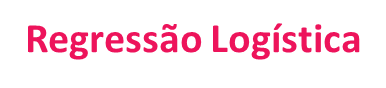

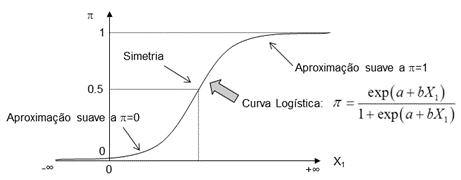

In [140]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
modelo = smf.glm(formula='Resposta ~ Atrasos + TempoRel + valorFatura + GastosAlim + RendaMensal + II + III + IV', data=Base_Inad_dmy,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Resposta   No. Observations:                10986
Model:                            GLM   Df Residuals:                    10977
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -5573.4
Date:                Tue, 13 Sep 2022   Deviance:                       11147.
Time:                        23:54:44   Pearson chi2:                 1.10e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3104
Covariance Type:            nonrobust                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.2501      0.069     18.080      

In [141]:
print(np.exp(modelo.params[1:]))

Atrasos        1.059186
TempoRel       0.922421
valorFatura    0.999886
GastosAlim     0.967887
RendaMensal    0.999979
II             0.519664
III            0.328514
IV             0.188852
dtype: float64


In [142]:
# Pessoas que moram na região II tem 0.54 das chances de ficar inadimplente do que outras pessoas 
# Pessoas que moram na região III tem 0.33 das chances que outras pessoas.

# Para cada ano a mais de sobrevivência o indivíduo fica com 0.96 das chances de outro indivíduo com um ano a menos.

# Podemos também gerar os mesmos dados em percentuais relativos de chances para compará-los e
# obter uma interpretação parecida com a interpretação da regressão linear, mas em termos de chances.


(np.exp(modelo.params[1:]) - 1) * 100

Atrasos         5.918593
TempoRel       -7.757900
valorFatura    -0.011413
GastosAlim     -3.211260
RendaMensal    -0.002103
II            -48.033590
III           -67.148615
IV            -81.114809
dtype: float64

In [143]:
# Agora vamos refazer o modelo utilizando scikit-learn para maior facilidade de obter as métricas de ajuste.
# Agora vamos fazer com sklearn para aproveitar as métricas
#Predicting using Logistic Regression for Binary classification 


model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = Base_Inad_dmy
y = y_train 
X = X_train
print(X)


       Atrasos   TempoRel  valorFatura  GastosAlim  RendaMensal  II  III  IV
5581         1   4.353425          947          21         3029   0    0   0
2010        12  13.695890          508          64         5284   0    0   0
5031        22   6.383562          247           5         1591   0    0   0
2514        50   2.098630         3942          20         1958   0    0   1
1840        17   7.898630         1095           8         2719   0    0   1
...        ...        ...          ...         ...          ...  ..  ...  ..
6061        38   0.528767         4720          24         6282   0    0   1
9529         0  12.947945         1476          12         2801   1    0   0
406         26  12.939726           67          16         2571   0    0   1
2191        17  13.693151          807           2        12192   0    0   1
10863        7   2.969863           62          55         1361   0    1   0

[7690 rows x 8 columns]


In [144]:
model.fit(X, y)  #fitting the model 

/home/alison/Documents/FIAP/conceitos_ia/venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:415: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/home/alison/Documents/FIAP/conceitos_ia/venv/lib/python3.8/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/alison/Documents/FIAP/conceitos_ia/venv/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(penalty='none', solver='newton-cg')

In [145]:
print(model.coef_) # Temos o mesmo modelo!

[[ 5.74071059e-02 -7.10546034e-02 -1.07999899e-04 -3.33181006e-02
  -1.63826337e-05 -6.28317949e-01 -1.11255380e+00 -1.72185670e+00]]


In [146]:
# Predizendo as probabilidades
yhat = model.predict_proba(X_test) #prediction
yhat

array([[0.98381902, 0.01618098],
       [0.2796363 , 0.7203637 ],
       [0.35947773, 0.64052227],
       ...,
       [0.43005921, 0.56994079],
       [0.71754319, 0.28245681],
       [0.13746493, 0.86253507]])

In [147]:
yhat = yhat[:, 1] # manter somente para a classe positiva
yhat

array([0.01618098, 0.7203637 , 0.64052227, ..., 0.56994079, 0.28245681,
       0.86253507])

In [148]:
# matriz de confusao
from sklearn.metrics import confusion_matrix

confusion_matrix_log1 = confusion_matrix(y_test, model.predict(X_test))
confusion_matrix_log1

array([[1256,  385],
       [ 388, 1267]])

In [149]:
pd.crosstab(y_test, model.predict(X_test))  # fazendo "na mão"

col_0,0,1
Resposta,,
0,1256,385
1,388,1267


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

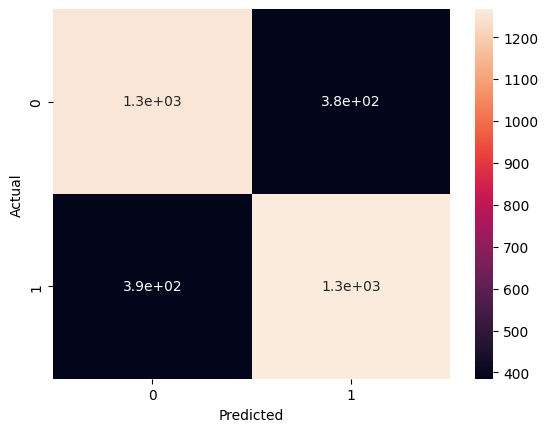

In [150]:
import seaborn as sn

confusion_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [151]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.77


In [152]:
from sklearn.metrics import accuracy_score

print('Accuracy: ',metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy:  0.7654733009708737


In [153]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      1641
           1       0.77      0.77      0.77      1655

    accuracy                           0.77      3296
   macro avg       0.77      0.77      0.77      3296
weighted avg       0.77      0.77      0.77      3296



In [154]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

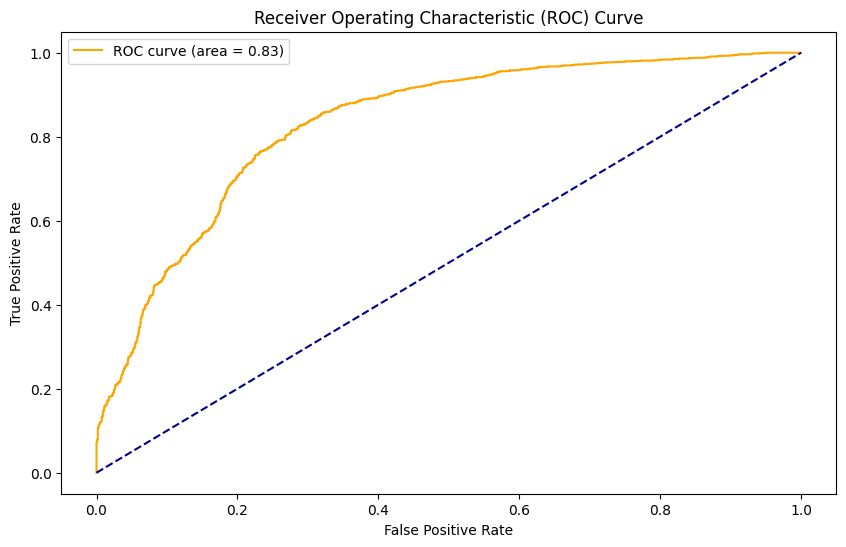

In [155]:
plot_roc_curve(y_test, yhat)

In [156]:
from sklearn.metrics import roc_auc_score

print('AUC: %0.2f' % roc_auc_score(y_test, yhat))

AUC: 0.83
